In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

from sklearn.model_selection import train_test_split

In [2]:
train_fm = pd.read_csv('data/train_prep.csv')
# test_fm = pd.read_csv('data/test_prep.csv')

In [3]:
train_fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   temp      341880 non-null  float64
 1   d_point   341880 non-null  float64
 2   feels     341880 non-null  float64
 3   min_temp  341880 non-null  float64
 4   max_temp  341880 non-null  float64
 5   prssr     341880 non-null  float64
 6   hum       341880 non-null  float64
 7   wind_spd  341880 non-null  float64
 8   wind_deg  341880 non-null  float64
 9   clouds    341880 non-null  float64
 10  rain_1h   341880 non-null  float64
dtypes: float64(11)
memory usage: 28.7 MB


In [4]:
train_fm.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds,rain_1h
0,24.75,23.89,25.76,24.28,25.22,1012.0,95.0,0.82,320.0,100.0,0.401359
1,24.58,23.73,25.57,23.99,25.26,1012.0,95.0,0.96,338.0,100.0,0.000000
2,26.60,24.06,26.60,26.10,27.39,1012.0,86.0,1.22,339.0,99.0,0.000000
3,27.31,24.37,30.90,26.59,28.36,1012.0,84.0,1.08,342.0,94.0,0.130000
4,27.41,25.05,31.54,26.58,28.31,1011.0,87.0,0.86,336.0,100.0,0.340000


In [9]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train_fm)
scaled_df = pd.DataFrame(train_scaled, columns=train_fm.columns)
scaled_df.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds,rain_1h
0,0.267782,0.363107,0.177882,0.374815,0.238494,0.750,0.861111,0.257862,0.676790,1.000000,0.014810
1,0.253556,0.332039,0.167971,0.353333,0.241841,0.750,0.861111,0.301887,0.714860,1.000000,0.000000
2,0.422594,0.396117,0.221701,0.509630,0.420084,0.750,0.611111,0.383648,0.716975,0.978723,0.000000
3,0.482008,0.456311,0.446009,0.545926,0.501255,0.750,0.555556,0.339623,0.723320,0.872340,0.004797
4,0.490377,0.588350,0.479395,0.545185,0.497071,0.625,0.638889,0.270440,0.710630,1.000000,0.012546


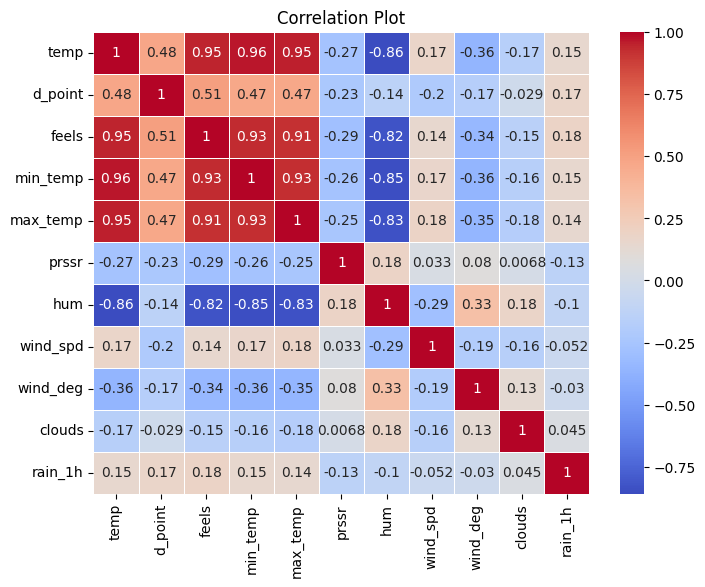

In [19]:
# Calculate the correlation matrix
correlation_matrix = train_fm.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [11]:
def plotDistribution(dataset, feature_name):
    plt.rcParams['figure.figsize'] = (15, 5)
    sns.histplot(dataset[feature_name], kde=True, color='blue', bins=30)
    plt.title(f'{feature_name} Distribution', family='Arial', fontsize=16)
    plt.xlabel(feature_name, family='Arial', fontsize=14)
    plt.ylabel('Frequency', family='Arial', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.tight_layout()
    plt.show()

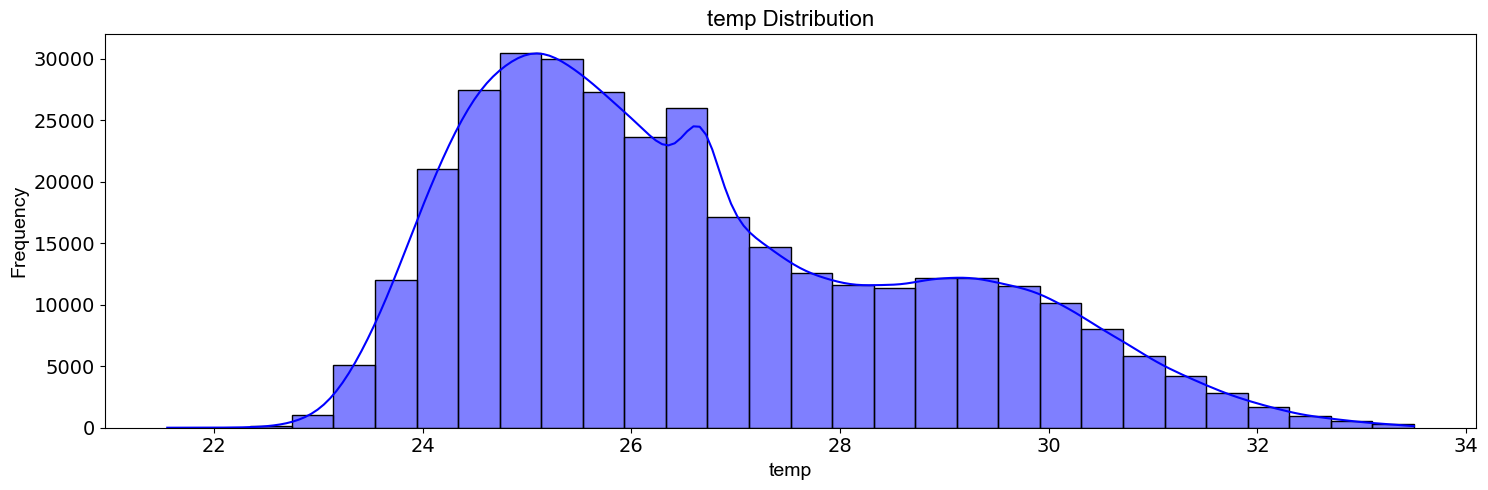

In [21]:
plotDistribution(train_fm, 'temp')

In [13]:
# selected_X = scaled_df[['feels', 'clouds', 'prssr']]
X = scaled_df.drop('rain_1h', axis = 1)
y = scaled_df['rain_1h']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.columns

Index(['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum',
       'wind_spd', 'wind_deg', 'clouds'],
      dtype='object')

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0, max_features =None)

# Fit the model to the data
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

RMSE:  0.03273237663411798


# Test

In [26]:
test_fm = pd.read_csv('data/test_dp.csv')

In [28]:
test_scaled = scaler.fit_transform(test_fm.drop('datetime_iso', axis = 1))
scaled_df_test = pd.DataFrame(test_scaled, columns=test_fm.drop('datetime_iso', axis = 1).columns)
scaled_df_test.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,clouds
0,0.000415,0.453057,0.000325,0.000599,0.015764,0.992358,0.84,0.000145,0.986111,0.97
1,0.000407,0.590611,0.000317,0.000603,0.019285,0.992358,0.91,0.000167,0.975000,0.95
2,0.000624,0.676856,0.001135,0.000801,0.024327,0.992358,0.84,0.000172,0.958333,0.90
3,0.000641,0.626638,0.001118,0.000850,0.023447,0.991266,0.81,0.000149,0.941667,0.91
4,0.000732,0.557860,0.001205,0.000929,0.029408,0.990175,0.74,0.000139,0.941667,0.96


In [32]:
scaled_df_test = scaled_df_test.fillna(scaled_df_test.mean())

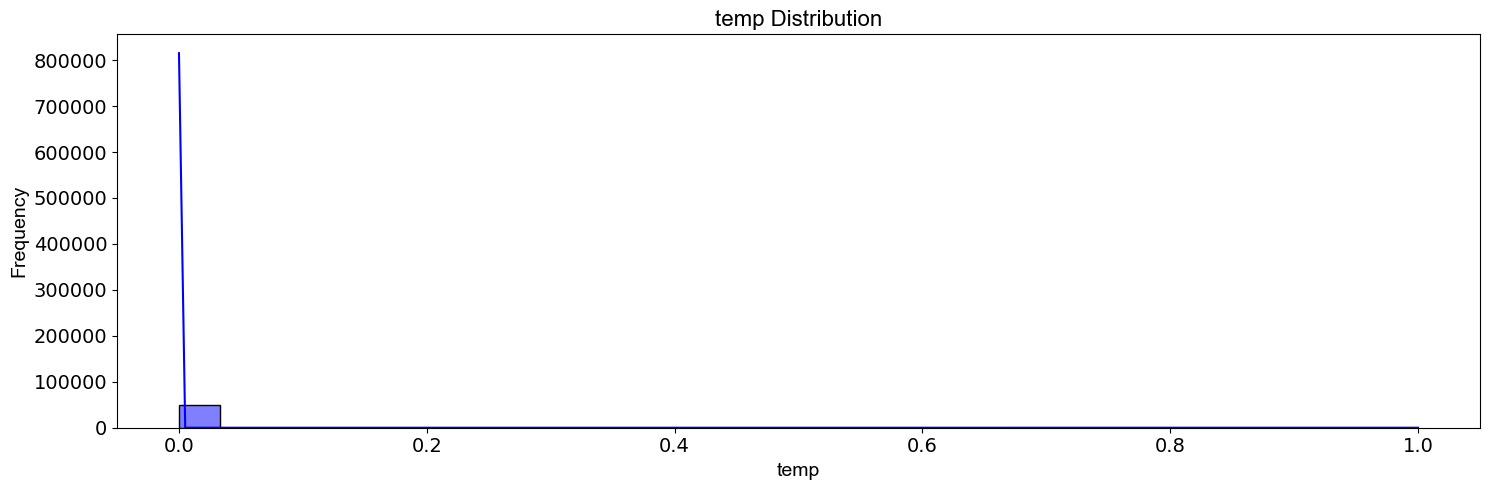

In [29]:
plotDistribution(scaled_df_test, 'temp')

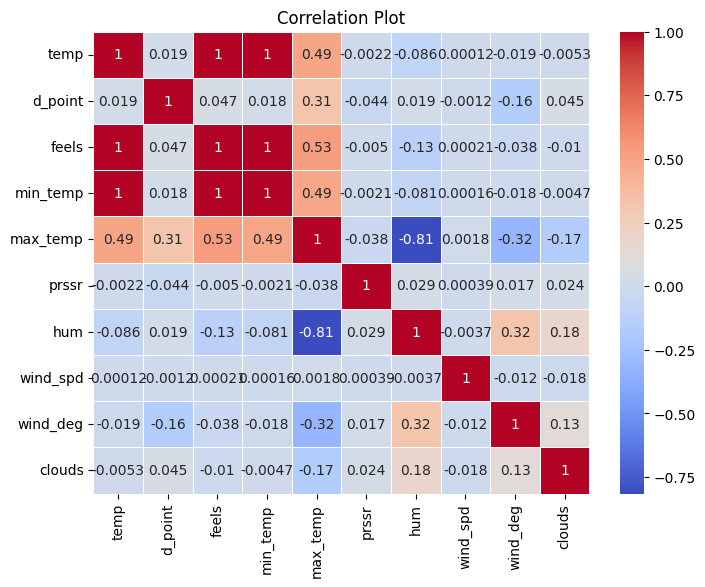

In [33]:
# Calculate the correlation matrix
correlation_matrix = scaled_df_test.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [34]:
predictions = rf_model.predict(scaled_df_test)

print(predictions)

[0.02788611 0.02894096 0.0526694  ... 0.02606406 0.02606406 0.05033511]


In [36]:
submission = pd.DataFrame({
    'datetime_iso': test_fm['datetime_iso'],
    'rain_1h': predictions
})

submission.to_csv('data/sample_submission.csv', index=False)

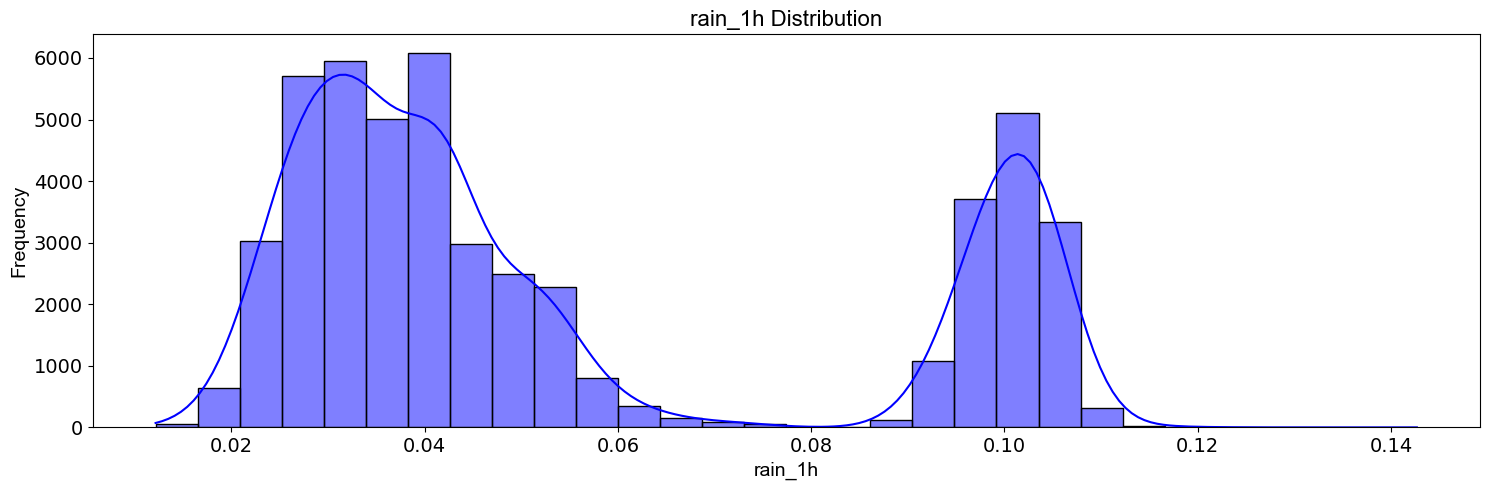

In [37]:
plotDistribution(submission, 'rain_1h')